<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">Homework 2</div><br/>
<div style="font-size: 18pt;">Answer the questions</div><br/><br/>
<div style="font-size: 18pt;">Q1. Why people are leaving this company?</div><br/>
<div style="font-size: 18pt;">Q2. What is the optimal threshold?</div><br/><br/>
<div style="font-size: 18pt;">Follow the instructions in this JN</div><br/>

In [254]:
#load necessary packages
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [255]:
#check current folder
os.getcwd()

'/Users/nindaba/Documents/vistula/semister-5/ai/work/02'

In [256]:
#load and inspect HR data
hr = pd.read_csv("HR_comma_sep.csv")
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [257]:
#understand the data format
hr.iloc[:,0:4].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337
std,0.248631,0.171169,1.232592,49.943099
min,0.090000,0.360000,2.000000,96.000000
25%,0.440000,0.560000,3.000000,156.000000
50%,0.640000,0.720000,4.000000,200.000000
75%,0.820000,0.870000,5.000000,245.000000
max,1.000000,1.000000,7.000000,310.000000


In [258]:
hr.iloc[:,4:8].describe()

,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.498233,0.144610,0.238083,0.021268
std,1.460136,0.351719,0.425924,0.144281
min,2.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000


In [259]:
hr.iloc[:,8:10].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [260]:
#examine columns sales and salary
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [261]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [262]:
#One cannot use strings in regression models, so typicall do one-hot coding

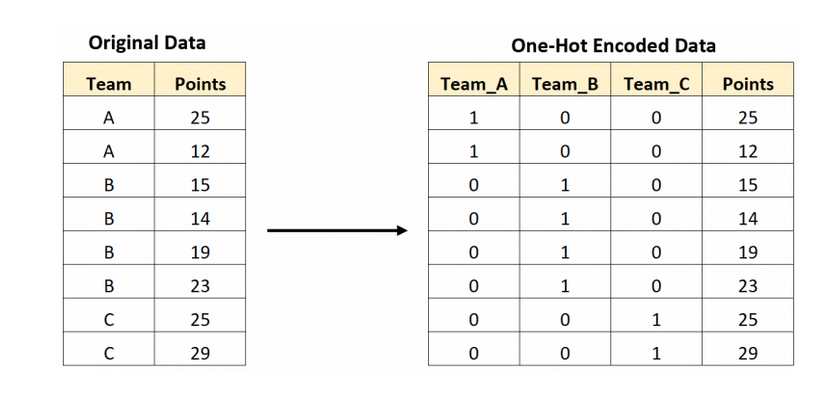

In [263]:
#do one-hot coding
job_type = pd.get_dummies(hr.sales, prefix='job')
salary_level = pd.get_dummies(hr.salary, prefix='salary')
job_type


,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [264]:
job_type.sum()

job_IT             1227
job_RandD           787
job_accounting      767
job_hr              739
job_management      630
job_marketing       858
job_product_mng     902
job_sales          4140
job_support        2229
job_technical      2720
dtype: int64

In [265]:
#create outcome vector and features dataframe
left = hr[['left']]
left = left['left'].ravel()
X = hr.drop(['left'], axis=1)

In [266]:
hr.sample(n=10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
8503,0.76,1.00,5,265,2,0,0,0,accounting,low
5480,0.72,0.66,3,256,2,0,0,0,IT,medium
13235,0.66,0.58,4,244,3,0,0,0,sales,medium
7630,0.55,0.89,4,209,3,0,0,0,RandD,low
10860,0.76,0.94,3,189,3,0,0,0,sales,medium
14278,0.90,0.98,4,264,6,0,1,0,product_mng,medium
9059,0.18,0.95,6,248,3,0,0,0,support,low
641,0.74,0.97,4,228,5,0,1,0,hr,low
12562,0.40,0.57,2,160,3,0,1,0,accounting,low
13745,0.64,0.79,4,139,3,0,0,0,sales,low


In [267]:
#merge with X
job_type.reset_index(inplace=True)
salary_level.reset_index(inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, job_type, salary_level], axis=1)
X.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'index', 'job_IT',
       'job_RandD', 'job_accounting', 'job_hr', 'job_management',
       'job_marketing', 'job_product_mng', 'job_sales', 'job_support',
       'job_technical', 'index', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [268]:
#drop columns we do not need
X = X.drop(['index','sales', 'salary', 'salary_medium'], axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical,salary_high,salary_low
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1


<div style="font-size: 14pt;">Exercise 1</div>
Answer question Q1: Who and why is leaving the company?

In [269]:
#check for multicollinearity
#use the graphic parameters below to get a well-sized heatmap
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 22})

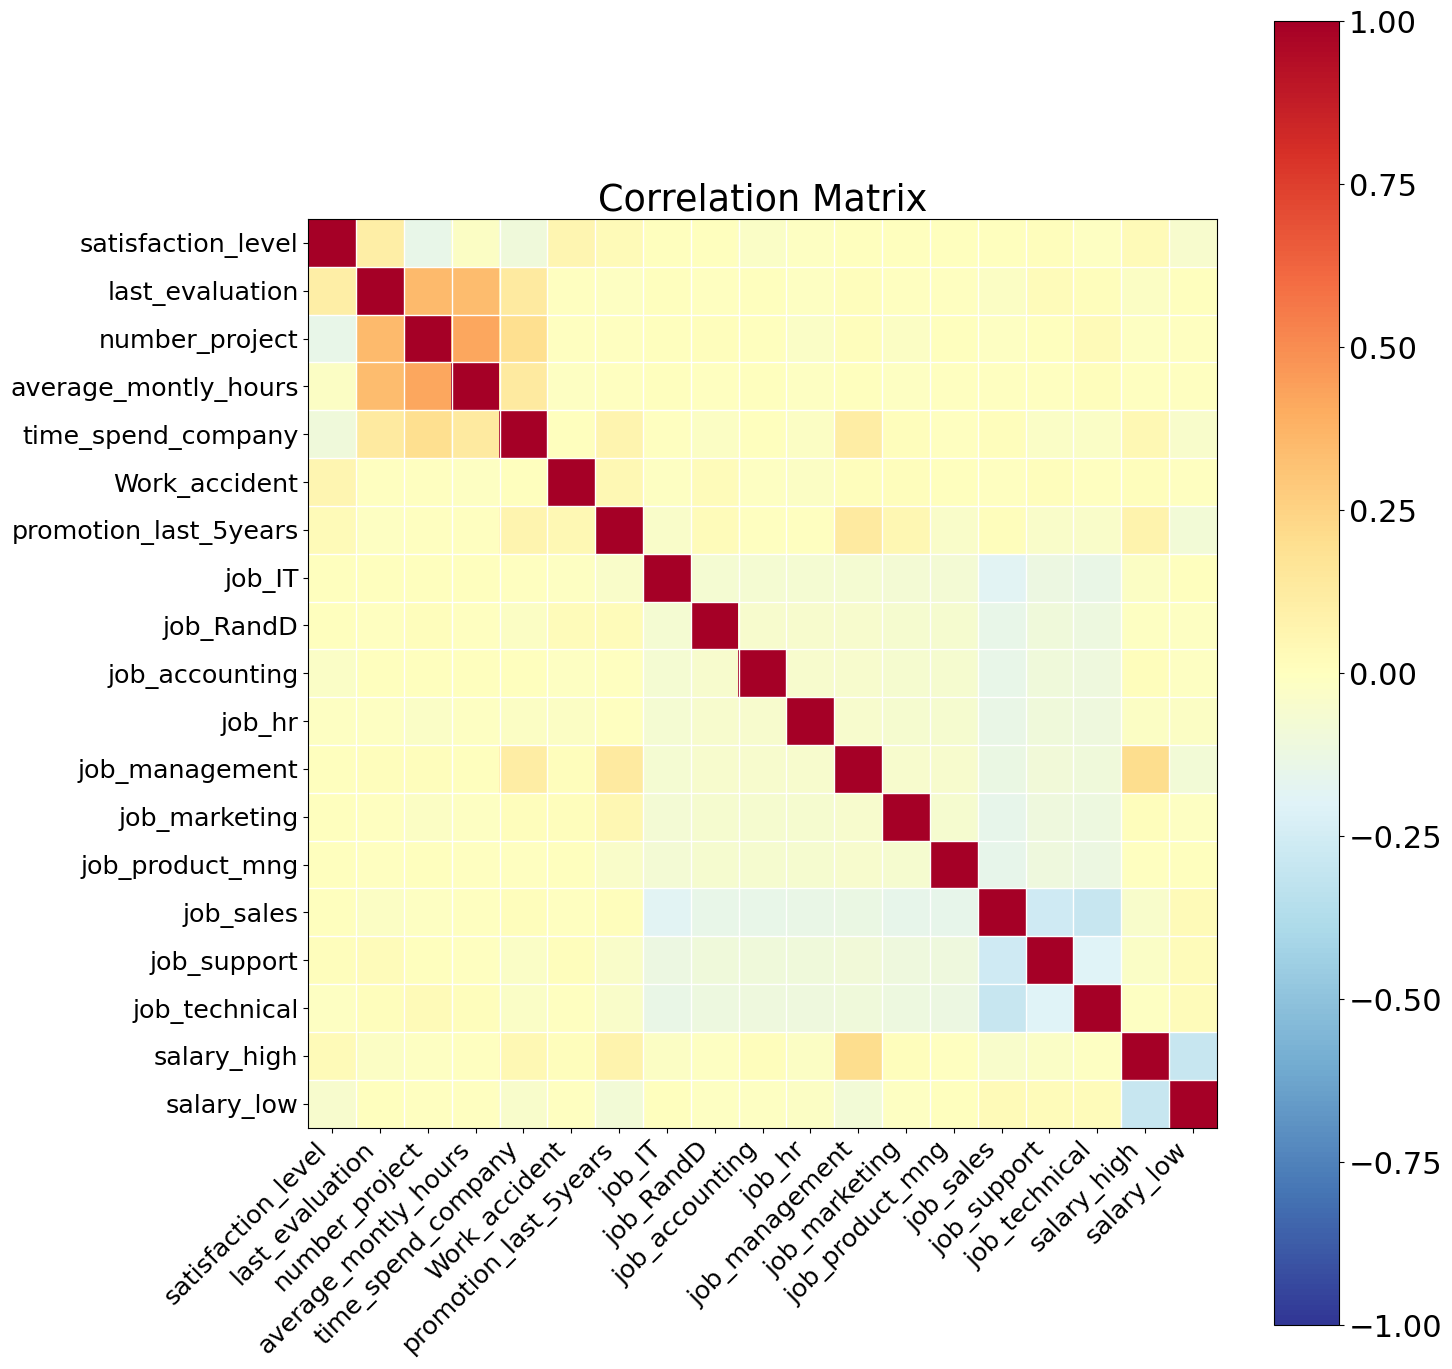

In [270]:
##add code here
corr = X.corr()
smg.plot_corr(corr,xnames=corr.columns.values ,normcolor=True)
plt.show()

In [271]:
#estimate economist style model using statsmodels library sm
#estimate the model using robust standard errors
#answer the Q1 question

In [297]:
X1 = sm.add_constant(X)
#add code here
model_ = sm.Logit(left,X1)
result_ro = model_.fit(method='newton', cov_type="HC0")
result_ro.summary()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.2195
Time:                        18:12:46   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  HC0   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1540        nan        nan        nan         nan         nan
satisfaction_level       -4.1357      0.111    -37.376      0.000      -4.353      -3.919
last_evaluation           0.7309      0.144      5.087      0.000       0.449       1.012
number_project           -0.3151      0.021    -15.126      0.000      -0.356      -0.274
average_montly_hours      0.0045      0.000      9.812      0.000       0.004       0.005
time_spend_company        0.2678      0.017     15.661      0.000       0.234       0.301
Work_accident            -1.5298      0.094    -16.348      0.000      -1.713      -1.346
promotion_last_5years    -1.4301      0.273     -5.233      0.000      -1.966      -0.895
job_IT                   -0.0898        nan        nan        nan         nan         nan
job_RandD                -0.4915        nan        nan        nan         nan         nan
job_accounting            0.0909        nan        nan        nan         nan         nan
job_hr                    0.3233        nan        nan        nan         nan         nan
job_management           -0.3575        nan        nan        nan         nan         nan
job_marketing             0.0788        nan        nan        nan         nan         nan
job_product_mng          -0.0623        nan        nan        nan         nan         nan
job_sales                 0.0521        nan        nan        nan         nan         nan
job_support               0.1409        nan        nan        nan         nan         nan
job_technical             0.1611        nan        nan        nan         nan         nan
salary_high              -1.4132      0.140    -10.098      0.000      -1.688      -1.139
salary_low                0.5308      0.046     11.465      0.000       0.440       0.622
=========================================================================================
"""

<div style="font-size: 14pt;">Exercise 2</div>
Answer question Q2: What is the optimal threshold?

In [301]:
#create train and test set with parameters:
#test_size = 0.2, random_state = 111

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical,salary_high,salary_low
3058,0.54,0.59,3,200,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1
11741,0.72,0.59,5,200,8,1,0,0,0,0,0,0,0,0,1,0,0,0,1
14652,0.36,0.78,2,151,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9912,0.69,0.66,3,206,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1
14491,0.10,0.98,6,268,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12597,0.11,0.90,6,263,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2035,0.76,0.60,4,177,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8181,0.84,0.71,4,222,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
408,0.91,0.92,4,246,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [302]:
#add code here
x_train,x_test,y_train,y_test = train_test_split(X,left,test_size = 0.2,random_state = 111,stratify=left)

In [275]:
#check outcome variable distribution, comment on the base model accuracy

In [303]:
#add code here
y_train.mean(),y_test.mean()

(0.2381031752646054, 0.238)

In [277]:
#define and train the logistic regression model, 
#set random_state = 100, solver = 'liblinear')

In [306]:
##add code here
model =LogisticRegression(random_state=100,solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [279]:
#make predictions and calculate confusion matrix, compare to base model
plt.rcParams["figure.figsize"] = (5,5)

<AxesSubplot:xlabel='predict', ylabel='actual'>

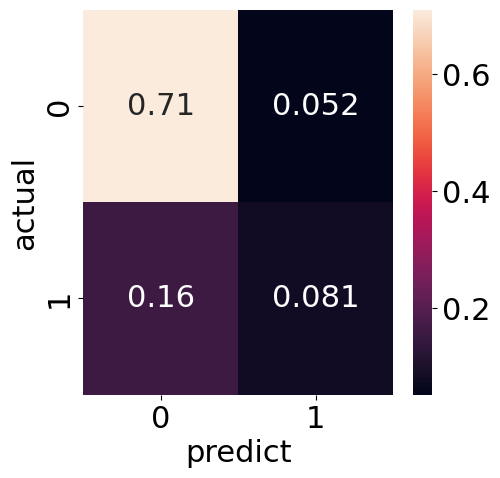

In [317]:
##add code here
y_predicted = model.predict(x_test)
cfm = pd.crosstab(y_test,y_predicted, rownames=['actual'], colnames= ['predict'])
cfm = cfm / cfm.sum().sum()
sns.heatmap(cfm,annot=True)

In [281]:
#calculate the ROC curve

In [319]:
##add code here
accuracy

NameError: name 'accuracy' is not defined

In [283]:
#plot the  ROC curve using the code below

In [284]:
plt.plot(fpr, tpr, label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()
roc_auc_score(y_test, y_prob)

NameError: name 'fpr' is not defined

In [ ]:
#experiment with the function below to find the optimal threshold

In [ ]:
def calculate_confusion_matrix(y_test, y_prob, threshold):
    y_pred_t = 1*(y_prob >= threshold)
    cfm = pd.crosstab(y_test, y_pred_t, rownames=['Actual'], colnames=['Predicted'])
    cfm = cfm / cfm.sum().sum()
    accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
    print("`Accuracy =  {:6.4f}".format(accuracy))
    return cfm, accuracy

In [ ]:
##add code here